In [1]:
from models.RL_model import RLModel
from stable_baselines3 import PPO, DQN
from environments.rush_hour_env import RushHourEnv
from utils.analyze_logs import analyze_logs
from GUI.visualizer import run_visualizer

from utils.config import MODEL_DIR, LOG_DIR, VIDEO_DIR, VIDEO_PATH, NUM_VEHICLES



In [2]:
def create_env(num_of_vehicles,file_path):
    env = RushHourEnv(num_of_vehicle=num_of_vehicles,file_path=file_path)
    return env

def create_model(env,model_class,model_name,early_stopping=True):  
    model_path = MODEL_DIR / model_name
    log_file = LOG_DIR / f"{model_name}.csv"
    model = RLModel(model_class, env, model_path=model_path,
                    log_file=log_file, early_stopping=early_stopping)

    return model

In [3]:
def train_model(env,model):
    """Train and save the RL model with logging and early stopping."""
    print("🚀 Training the model...")
    env.set_train()
    model.train()
    model.save()

    return model.model_path

def evaluate_model(env,model):
    """Evaluate the trained model."""
    print("🚀 Evaluating the model...")
    env.set_test()
    model.evaluate(env)

In [4]:
def analyze_training_logs(logs_files):
    """Analyze the logs and generate plots."""
    print("\n📊 Analyzing training logs...")
    analyze_logs(logs_files)
    print("✅ Log analysis completed. Plots displayed.")


def visualize_and_save(test_env,model_path, video_path=VIDEO_PATH):
    """Visualize the trained model and save a video."""
    print("\n🎥 Generating and saving visualization...")
    # Run visualizer with recording enabled
    run_visualizer(test_env,model_path, record=True, output_video=str(video_path))
    print(f"✅ Video saved at: {video_path}")

def get_model_name(model_class,file_path,num_of_boards):
    return f"{model_class.__name__}_{file_path[9:-5]}_{num_of_boards}"

-----PPO_10000_cards_2_cars_1_trucks_100-----
🧠 Initializing PPO model...
🚀 Training the model...
📚 Training the model with early stopping and logging...
🛑 Early stopping: success rate threshold reached!
💾 Model saved to: models_zip\PPO_10000_cards_2_cars_1_trucks_100
✅ Step 1: Model training completed.
🚀 Evaluating the model...

🚀 Evaluating on test boards...

📊 Test Evaluation Results:
✅ Solved 15/20
🏆 Success rate: 75.00%
📈 Avg reward: 490.60
⏱️ Avg steps to solve: 38.20
✅ Step 2: Model evaluation completed.
-----PPO_10000_cards_2_cars_1_trucks_250-----
🧠 Initializing PPO model...
🚀 Training the model...
📚 Training the model with early stopping and logging...
🛑 Early stopping: success rate threshold reached!
💾 Model saved to: models_zip\PPO_10000_cards_2_cars_1_trucks_250
✅ Step 1: Model training completed.
🚀 Evaluating the model...

🚀 Evaluating on test boards...

📊 Test Evaluation Results:
✅ Solved 42/50
🏆 Success rate: 84.00%
📈 Avg reward: 590.82
⏱️ Avg steps to solve: 45.93
✅ St

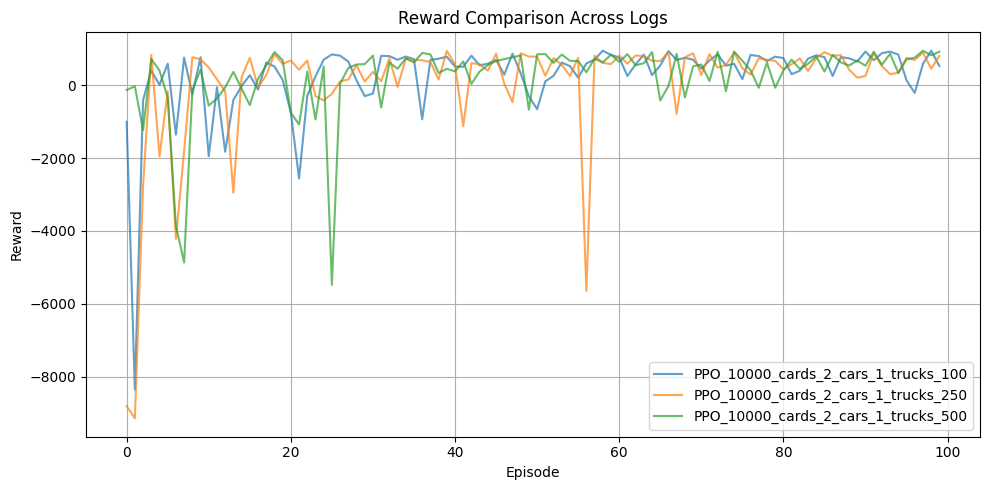

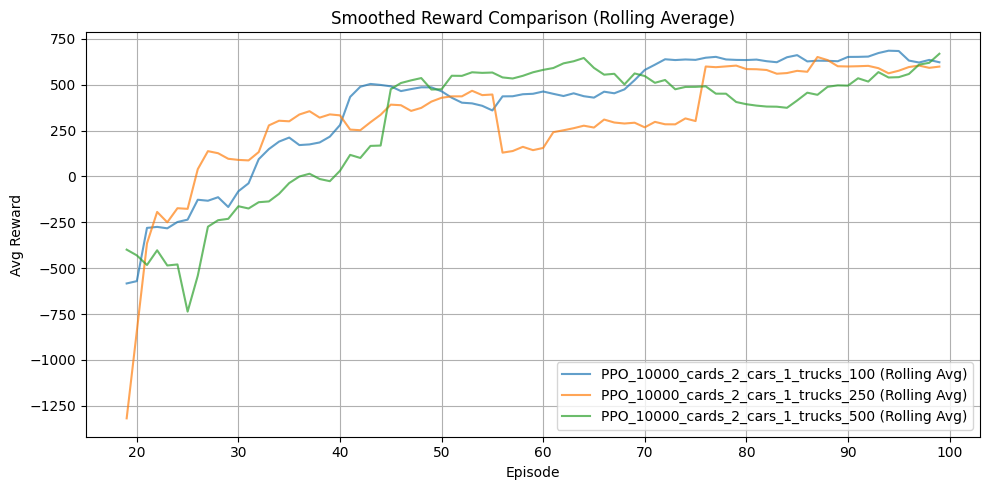

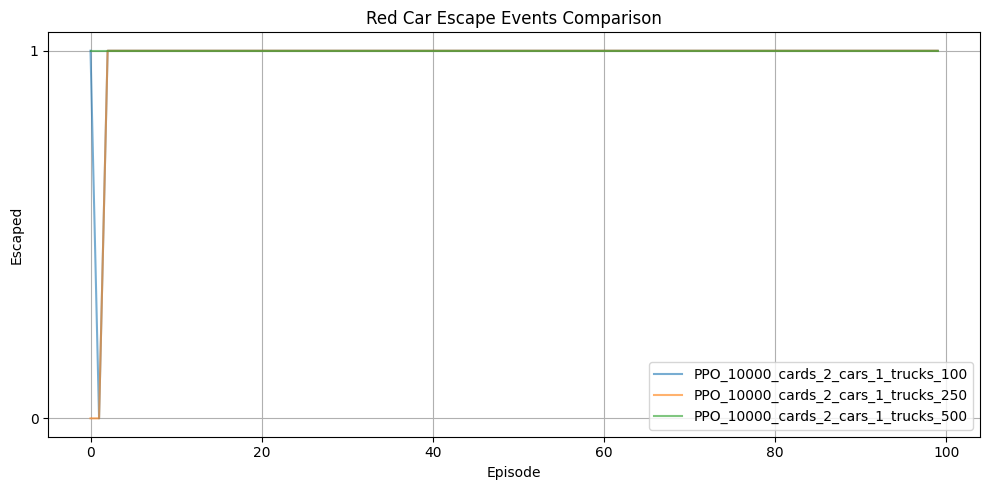

✅ Log analysis completed. Plots displayed.
✅ Log analysis completed. Plots displayed.
✅ Step 3: Log analysis completed.

🎉 All steps completed successfully!


In [5]:
import os
os.chdir(r"C:\Users\nitza\Desktop\code\DL\Rush-Hour-Solver")
num_of_vehicles = 4
file_path = "database/10000_cards_2_cars_1_trucks.json"
#num_of_boards = (100,500,1000,5000,10000)
num_of_boards = (100,250,500)
models= [PPO,]
if __name__ == "__main__":
    logs_files = []
    models_path = []
    early_stopping = True
    env = create_env(num_of_vehicles,file_path)

    for model_class in models:
       for num_of_board in num_of_boards:
            model_name = get_model_name(model_class,file_path,num_of_board)
            print(f"-----{model_name}-----")
            env.update_num_of_boards(num_of_board)
            model = create_model(env,model_class,model_name,early_stopping)
            train_model(env,model)
            print("✅ Step 1: Model training completed.")
            evaluate_model(env,model)
            print("✅ Step 2: Model evaluation completed.")
            logs_files.append(model.log_file)
            models_path.append(model.model_path)

    # Step 3: Analyze training logs
    analyze_training_logs(logs_files)
    print("✅ Step 3: Log analysis completed.")


    print("\n🎉 All steps completed successfully!")

In [6]:
visualize_and_save(env,models_path[-1])


🎥 Generating and saving visualization...
Step 1: X → R, reward: -1
Step 2: J → L, reward: -6
Step 3: D → L, reward: -6
Step 4: R → R, reward: -6
Step 5: J → D, reward: -6
Step 6: J → D, reward: -6
Step 7: J → R, reward: -6
Step 8: X → U, reward: -6
Step 9: X → R, reward: -1
Step 10: J → U, reward: -6
Step 11: D → U, reward: -1
Step 12: R → D, reward: -1
Step 13: X → R, reward: -6
Step 14: X → R, reward: -6
Step 15: X → U, reward: -6
Step 16: J → D, reward: -6
Step 17: R → L, reward: -6
Step 18: X → U, reward: -6
Step 19: D → U, reward: -1
Step 20: R → D, reward: -1
Step 21: R → D, reward: -1
Step 22: X → D, reward: -6
Step 23: R → U, reward: -1
Step 24: X → U, reward: -6
Step 25: J → L, reward: -6
Step 26: X → R, reward: -1
Step 27: R → D, reward: -1
Step 28: D → R, reward: -6
Step 29: D → R, reward: -6
Step 30: D → D, reward: -6
Step 31: X → R, reward: 999
✅ Escaped!
✅ Video saved to logs\videos\rush_hour_demo.mp4
✅ Video saved at: logs\videos\rush_hour_demo.mp4
